<a href="https://colab.research.google.com/github/faizuddin/IBB31103/blob/main/supervised_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning
## Introduction to Artificial Intelligence (IBB31103)

In general we have two types of supervised learning:

1. Regression (given training data + desired labeled continuous outputs)
2. Classification (given training data + desired labeled categorical outputs)

## Supervised Learning

We will use simple two dimensional data set from [here](https://archive.org/download/ages-and-heights/AgesAndHeights.pkl). Download the dataset into this notebook using [wget](https://www.gnu.org/software/wget/) and visualise them.

The dataset is in [pickle](https://docs.python.org/3/library/pickle.html) format.

In [ ]:
!wget https://archive.org/download/ages-and-heights/AgesAndHeights.pkl

--2021-10-21 04:50:54--  https://archive.org/download/ages-and-heights/AgesAndHeights.pkl
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia601802.us.archive.org/31/items/ages-and-heights/AgesAndHeights.pkl [following]
--2021-10-21 04:50:54--  https://ia601802.us.archive.org/31/items/ages-and-heights/AgesAndHeights.pkl
Resolving ia601802.us.archive.org (ia601802.us.archive.org)... 207.241.227.72
Connecting to ia601802.us.archive.org (ia601802.us.archive.org)|207.241.227.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2406 (2.3K) [application/octet-stream]
Saving to: ‘AgesAndHeights.pkl.1’

AgesAndHeights.pkl. 100%[===================>]   2.35K  --.-KB/s    in 0s      

2021-10-21 04:50:54 (244 MB/s) - ‘AgesAndHeights.pkl.1’ saved [2406/2406]



In [ ]:
# important data structure library!
import pandas as pd

# read pickle format
rawdataset = pd.read_pickle("AgesAndHeights.pkl")

### Visualise data using histogram
Use Pandas [``hist()``](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) to visualise approximate representation of the distribution of numerical data. The Y-axis in both the plots refers to frequency and X-axis represents *Age* and *Height* respectively.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79f16cf150>,
      dtype=object)

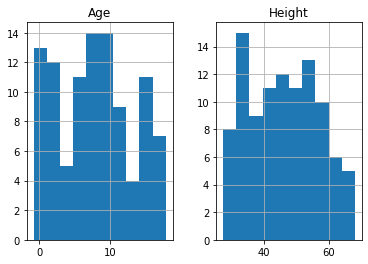

In [ ]:
rawdataset.hist()

### Data Cleaning

We are going to build model using valid dataset and clean the unaccountable data (empty/null). In the above histograms, we can see that there are a few entries that have an age less than zero which is meaningless. Hence, we need to clean those data to get better accuracy.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79f15890d0>,
      dtype=object)

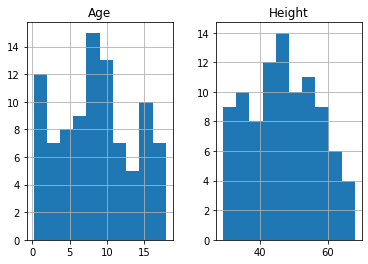

In [ ]:
cleandataset = rawdataset[rawdataset["Age"]>0]
cleandataset.hist()

### Visualise data using scatter plot
We will represent *Age* on X-axis and *Height* on Y-axis. The points in the plot refer to data from `cleandataset`. We use Pandas  [`plot.scatter()`](https://https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.plot.scatter.html) to plot.

Text(0.5, 0, 'Age (year)')

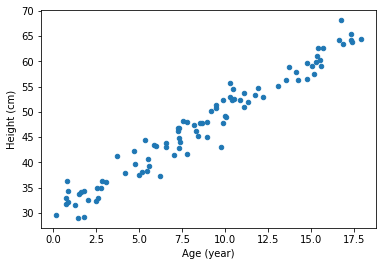

In [ ]:
# Draw a scatter plot
ax = cleandataset.plot.scatter(x = 'Age', y = 'Height');

# Set x and y axis labels
ax.set_ylabel("Height (cm)")
ax.set_xlabel("Age (year)")

### Build the model and train it

Here we are going to use simple [linear regression](https://en.wikipedia.org/wiki/Linear_regression) to train our *Age-Height* model.

Steps:

1. Learn parameters
2. Train model using the learned (optimal) parameters
3. Evaluate prediction

### Learning paramaters
We create a function called `learnpars()` that uses the basic straight-line equation and returns `y`, in our case *Height*. If we pass the required parameters and run `learnpars()`, we will find that the height we get for the age as input does not match. Hence, we use `learnpars()` to train the model.

Straight line equation: `Y = a + bX` (a = alpha, b=beta)

In [ ]:
pars = {"alpha" : 40, "beta" : 4}

def y_height(age, pars):
  alpha = pars["alpha"]
  beta = pars["beta"]
  return alpha + beta * age

y_height(18, pars)

112

In [ ]:
def learnpars(data, pars):
  x,y = cleandataset["Age"], cleandataset["Height"]
  x_bar, y_bar = x.mean(), y.mean()
  x,y = x.to_numpy(), y.to_numpy()
  beta = sum((x-x_bar) * (y-y_bar) / sum((x-x_bar)**2))
  alpha = y_bar - beta * x_bar
  pars["alpha"] = alpha
  pars["beta"] = beta

In [ ]:
# Find the correct parameters
newpars = {"alpha" : 0, "beta" : 0}
learnpars(cleandataset,newpars)

# The optimal alpha and beta parameters
newpars

{'alpha': 29.961857614615834, 'beta': 2.0014168989106302}

### Dummy dataset
This demonstrates how parameters selection can impact the model.

In [ ]:
# Create a dummy list of age
dummy_ages = list(range(19))

# Predict height using unoptimised parameters
untrained_predicted_heights = [y_height(age, pars) for age in dummy_ages]

# Create a dataframe
untrained = pd.DataFrame(list(zip(dummy_ages, untrained_predicted_heights)), columns =['Age', 'Height'])

untrained

,Age,Height
0,0,40
1,1,44
2,2,48
3,3,52
4,4,56
5,5,60
6,6,64
7,7,68
8,8,72
9,9,76


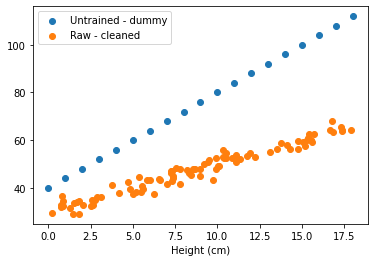

In [ ]:
import matplotlib.pyplot as plt

# Draw a scatter plot
plt.scatter(untrained["Age"], untrained["Height"], label="Untrained - dummy");
plt.scatter(cleandataset["Age"], cleandataset["Height"], label="Raw - cleaned");

# Set x and y axis labels
plt.xlabel("Age (year)")
plt.xlabel("Height (cm)")
plt.legend()

### Regression using trained parameters

We do a regression over `cleandataset` using the trained parameters (`newpars`) by calling `y_height()` and we plot the prediction results.

In [ ]:
# run regression
trained_predicted_heights = [y_height(age, newpars) for age in cleandataset["Age"]]

# Create a dataframe
trained = pd.DataFrame(list(zip(cleandataset["Age"], trained_predicted_heights)), columns =['Age', 'Height'])

,Age,Height
0,14.767874,59.518530
1,3.107671,36.181604
2,7.266917,44.505988
3,1.815180,33.594789
4,16.753758,63.493111
...,...,...
88,7.323712,44.619658
89,5.591509,41.152799
90,2.625606,35.216789
91,5.519293,41.008264


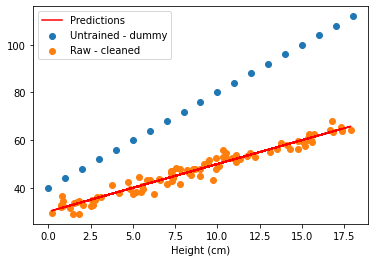

In [ ]:
# Draw a scatter plot
plt.scatter(untrained["Age"], untrained["Height"], label="Untrained - dummy");
plt.scatter(cleandataset["Age"], cleandataset["Height"], label="Raw - cleaned");
# Regression results
plt.plot(trained["Age"], trained["Height"], label="Predictions", color="red");

# Set x and y axis labels
plt.xlabel("Age (year)")
plt.xlabel("Height (cm)")
plt.legend()

trained

### Evaluate prediction performance

We need to measure how well is our model predicting the height. Therefore we use [Root Mean Squared Error (MAE)](https://en.wikipedia.org/wiki/Root-mean-square_deviation) to measure how far is our predicted values from the actual values, on average.

In [ ]:
from sklearn.metrics import mean_squared_error 

# root mean squared error: how far predicted from the actual value, on average
rmse = mean_squared_error(cleandataset["Height"], trained["Height"], squared = False)

print("RMSE: " + str(rmse) + "cm")

RMSE: 2.150968738235214cm


### Predicting unseen data

We can test our model to predict model using a completely new, unseen data.

In [ ]:
age_input = int(input("Enter an age to predict height: "))
y_height(age_input, newpars)

Enter an age to predict height: 15


59.98311109827529

## Multiple Linear Regression
In the previous simple linear example, we only deal with one independent variable (age) and one dependent variable (height).

In cases when we have more than one independent variables (features) and one dependent variable, we call it a multiple linear regression problem. 

To do multiple linear regression, we first convert the standard linear equation:

`y = a + Bx`

to

`y = a + B1x1 + B2x2 + ... + Bnxn`

where `a` is the intercept and `B1, B2, ... ,Bn` are the coefficients (slope) concerning independent variable `x1, x2, ..., xn`. This essentially indicates that if we increase the value of `x1` by 1 unit then `B1` says that how much value it will affect `y`, and this was similar concerning for `B2, ... ,Bn`.

The next example demonstrates this case. We will use 2016 Air Quality dataset which consists of 9538 instances. Full description of this dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Air+Quality)


In [ ]:
# Download dataset
! wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip"

--2021-11-10 14:11:39--  https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1543989 (1.5M) [application/x-httpd-php]
Saving to: ‘AirQualityUCI.zip’

AirQualityUCI.zip   100%[===================>]   1.47M  3.32MB/s    in 0.4s    

2021-11-10 14:11:40 (3.32 MB/s) - ‘AirQualityUCI.zip’ saved [1543989/1543989]



In [ ]:
# Unzip
! unzip "AirQualityUCI.zip"

Archive:  AirQualityUCI.zip
  inflating: AirQualityUCI.csv       
  inflating: AirQualityUCI.xlsx      


In [ ]:
# important data structure library!
import pandas as pd

# Read raw dataset file into Pandas dataframe
df = pd.read_excel("AirQualityUCI.xlsx")

In [ ]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [ ]:
X = df.drop(["Date", "Time", "NO2(GT)"], axis=1)
y = df["NO2(GT)"]

Text(0, 0.5, 'NO2(GT)')

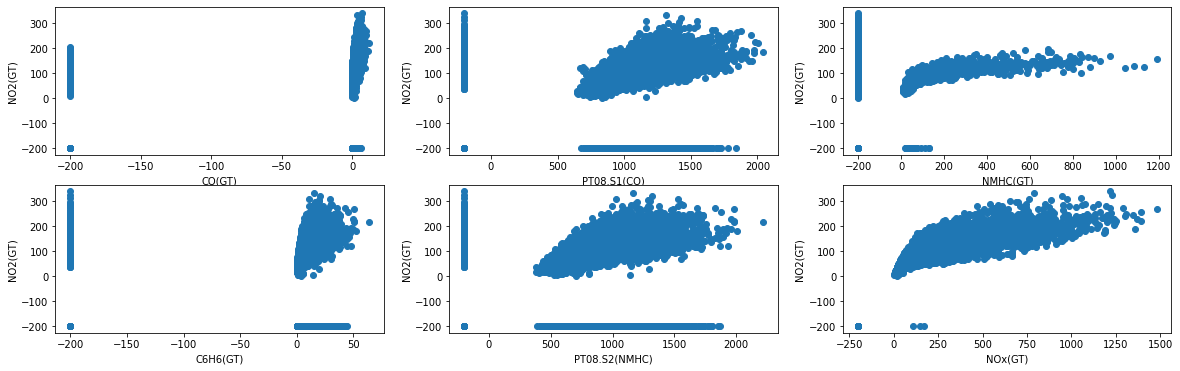

In [ ]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(20,6))

plt.subplot(2,3,1)
plt.scatter(X.iloc[:,0], y)
# Set x and y axis labels
plt.xlabel("CO(GT)")
plt.ylabel("NO2(GT)")
# plt.legend()

plt.subplot(2,3,2)
plt.scatter(X.iloc[:,1], y)
# Set x and y axis labels
plt.xlabel("PT08.S1(CO)")
plt.ylabel("NO2(GT)")
# plt.legend()

plt.subplot(2,3,3)
plt.scatter(X.iloc[:,2], y)
# Set x and y axis labels
plt.xlabel("NMHC(GT)")
plt.ylabel("NO2(GT)")
# plt.legend()

plt.subplot(2,3,4)
plt.scatter(X.iloc[:,3], y)
# Set x and y axis labels
plt.xlabel("C6H6(GT)")
plt.ylabel("NO2(GT)")
# plt.legend()

plt.subplot(2,3,5)
plt.scatter(X.iloc[:,4], y)
# Set x and y axis labels
plt.xlabel("PT08.S2(NMHC)")
plt.ylabel("NO2(GT)")
# plt.legend()

plt.subplot(2,3,6)
plt.scatter(X.iloc[:,5], y)
# Set x and y axis labels
plt.xlabel("NOx(GT)")
plt.ylabel("NO2(GT)")
# plt.legend()



In [ ]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
# importing module
from sklearn.linear_model import LinearRegression

# creating an object of LinearRegression class
LR = LinearRegression()

# fitting the training data
mlr = LR.fit(X_train,y_train)

In [ ]:
y_pred =  mlr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 

# r2 score
score = r2_score(y_test, y_pred)

# root mean squared error: how far predicted from the actual value, on average
rmse = mean_squared_error(y_test, y_pred, squared = False)

print("r2 score: ", score)
print("RMSE: ", rmse)

r2 score:  0.9128523651822775
RMSE:  2.9726239507189502
